# Group Name: XOR ve Ötesi



# Contributed Group Members:  
Put your name here if you have put comparable effort to others in the groups.  
1- Burak Arslan
2- Emir Bahadır Ünsal
3- Yusuf Onat Yılmaz


## Submission
Goto File --> Download --> Download .ipynb
Submit the downloaded file through the ODTU class assignment.  
1 submission per group is expected.
Before submission please name your files as ```groupname.ipynb```

#Adventures of a hydrophobic robot that does image processing and seach 

Let's start with imports right away followed by the story line...

You can add necessary **imports** below or into other code blocks as you find fit.

--2023-01-22 15:37:02--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/creekStones.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2697 (2.6K) [text/plain]
Saving to: ‘creekStones.py’

creekStones.py      100%[===================>]   2.63K  --.-KB/s    in 0s      

2023-01-22 15:37:02 (47.2 MB/s) - ‘creekStones.py’ saved [2697/2697]

--2023-01-22 15:37:02--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/c3po_creek.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398360 (389K) [image/pn

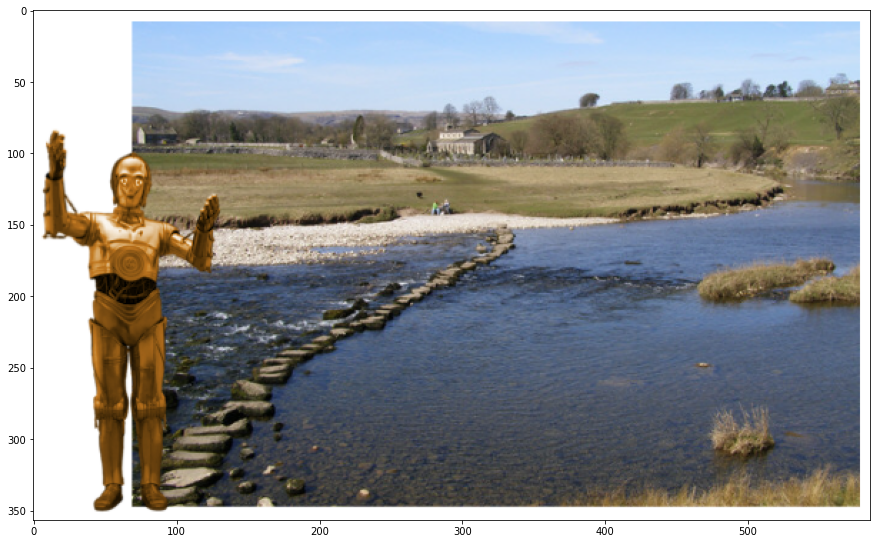

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

!rm *.py
!rm *.png
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/creekStones.py
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/c3po_creek.png
from creekStones import creekImage
# make plot a bit bigger
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(io.imread('c3po_creek.png'))

##The story goes as: C3PO is hydrophobic but needs to cross the creek
Therefore, C3PO tries to determine a series of stones by stepping over which C3PO will cross the creek without dipping into water.

Assume that C3PO is capable to take a picture of the creek and convert it into a picture as shown below.

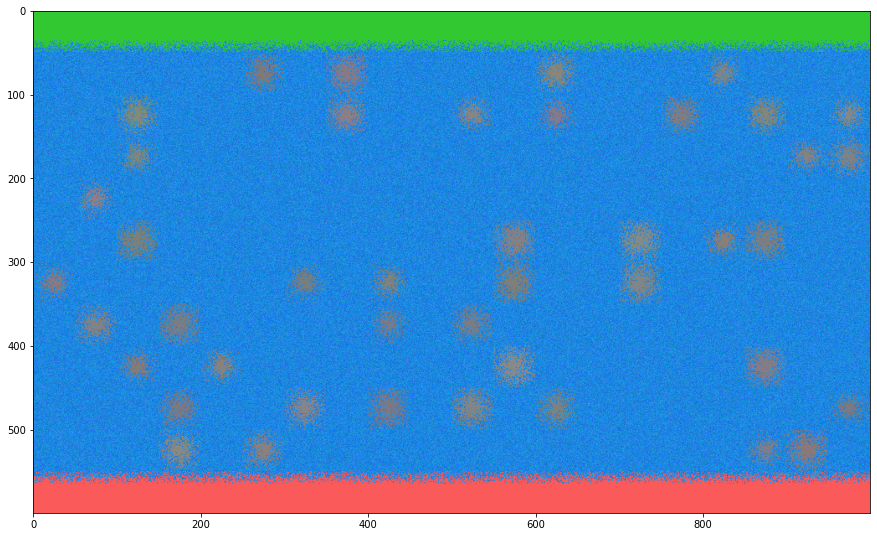

In [60]:
plt.imshow(creekImage())

## Assumptions
Assume that C3PO is on the red side of the creek and wants to go to the green side (top part of this image).  

Blue part is the creek, and grayish spots are stones. Fuzzy nature of the image is representing the real-life noise.

Note that each time the ```creekImage()``` function is called, a new image will be returned. Hence, your solution should not focus on a particular image instance!   
Also note that you can pass a parameter to this funciton in ```[0.1 - 0.99]``` range that will determine how crowded the stones over the creek will be. This is how we will test  your code!

## Your Main Task and Subtaks...
You are to determine a path which will take C3PO to the green side starting from the red side (i.e. to the top of the image from the bottom side).  

At the end, you are expected to draw this path from the red side to the green side, where the path is connecting both sides by stepping over a series of stones.  

In detecting stones, do not be too picky, there is noise after all.  

In order for a stone to be a part of the path, it should be large enough. This constraint will be given as the area of the connected component below. 

Once you find (*threshold, label connected components etc*) all the stones on the creek, mark their bounding boxes and centers (*intersection of bounding box diagonals is acceptable*) on the image. Steppable ones should have **green**, others should have **red** boxes around them.

There might be small connected components that do look like very small stones. It is your duty to study several scenes and to decide on how you can get rid of noisy pixel groups that act like a stone (if they do) beyond just using erosion and dilation.

Once stones that can be used in constructing a path across the creek, you should start your search. Your search is expected to yield the minimum number of step solution.

Given that C3PO is bipedal, there is a limit on its stride length. This constraint implies that maximum number of pixels between the centers of consequitive stones on the solution path should be less than a certain value, i.e. the step length of C3PO. This value is also defined below.

If a path given the current constraints cannot be found, your algorithm should print a proper message.

If a path is found, solution should be drawn on the image. Note that C3PO is on the red part, and it can walk right to left on the red part, so it can start from a proper location on the red region. Also note that it does not matter where C3PO arrives on the green side, as long as the solution path ends somewhere in the green shore. You are to determine the starting end ending points of your solution based on the constaints and the captured image.

## A support function to make your life potentially easier:
The following is simple function you can use to draw lines and boxes on images and save time.

Note that figure below is figurative, your boxes should enclose individual stones. Solution path should start from somewhere on the green side ending up on the red side by only connecting the stones that are steppable and belong to the solution path. 

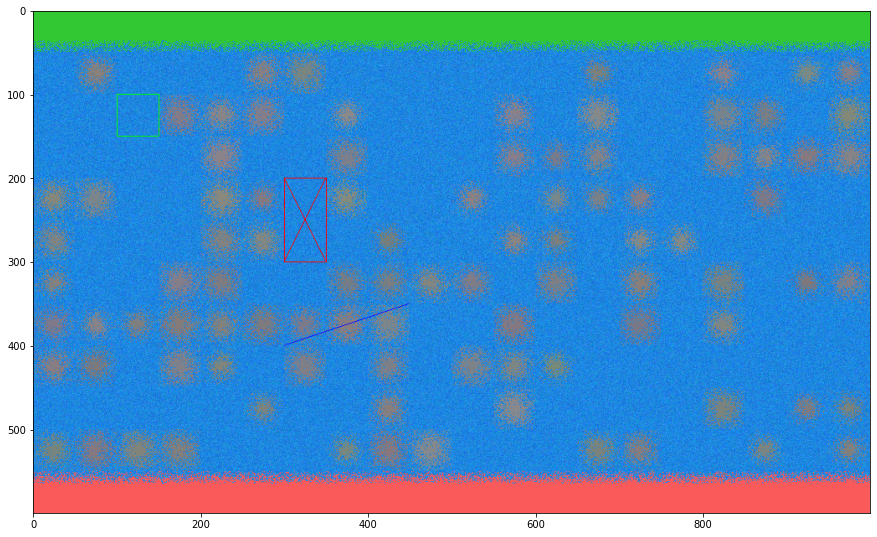

In [61]:
def DrawOnImage(img, coord, box=False, diagonals = True, dpen = (255,0,0)):
    '''
    This funciton takes an image, and a coordinate pair in the form of ((y1,x1), (y2,x2))
    These two points can either belown to the two ends of a line, 
    or the two opposite corners of a box
    if box = False, a line is drawn between these two points,
    else a box with its diagonals are drawn. So that you do not need to worry about the center of it
    if you do not want the diagonal, make it False
    The final parameter is the pen to draw with, by default lines will be RED
    everything is drawn on a copy of the image sent, and this copy is returned
    '''
    # create a copy of the image
    img_new = img.copy()
    P1, P2 = coord # get the points out of the coordinates list
    # assume that line or box extends from P1(y1,x1) to P2(y2,x2), note that y preceeds x to be consistent with matrix indexing convention
    maxNP = max(( abs(P2[0]-P1[0]) , abs(P2[1]-P1[1])))
    if box: # then draw a box 
        img_new[P1[0], P1[1]:P2[1], :] = dpen
        img_new[P1[0]:P2[0], P2[1], :] = dpen
        img_new[P2[0], P1[1]:P2[1], :] = dpen
        img_new[P1[0]:P2[0], P1[1], :] = dpen
        if diagonals:
            img_new[ np.linspace(P1[0],P2[0], maxNP).astype('int'), np.linspace(P1[1],P2[1], maxNP).astype('int'), :] = dpen
            img_new[ np.linspace(P2[0],P1[0], maxNP).astype('int'), np.linspace(P1[1],P2[1], maxNP).astype('int'), :] = dpen
    else: # draw a line
        img_new[ np.linspace(P1[0],P2[0], maxNP).astype('int'), np.linspace(P1[1],P2[1], maxNP).astype('int'), :] = dpen
    return img_new

# test the funciton
penRed = (255,0, 0)
penGreen = (0,255,0)

test_img = creekImage(0.5)
# a red box with diagonals
test_img = DrawOnImage(test_img, ((200, 300),(300, 350)), box=True) 
# a green box with no diagonals
test_img = DrawOnImage(test_img, ((100, 100),(150, 150)), box=True, diagonals = False, dpen=penGreen)
# finally a blue line
test_img = DrawOnImage(test_img, ((400, 300),(350, 450)), dpen = (20,20,255)) 
# finally plot the image
plt.imshow(test_img)



#Let's get started
First generate a test image


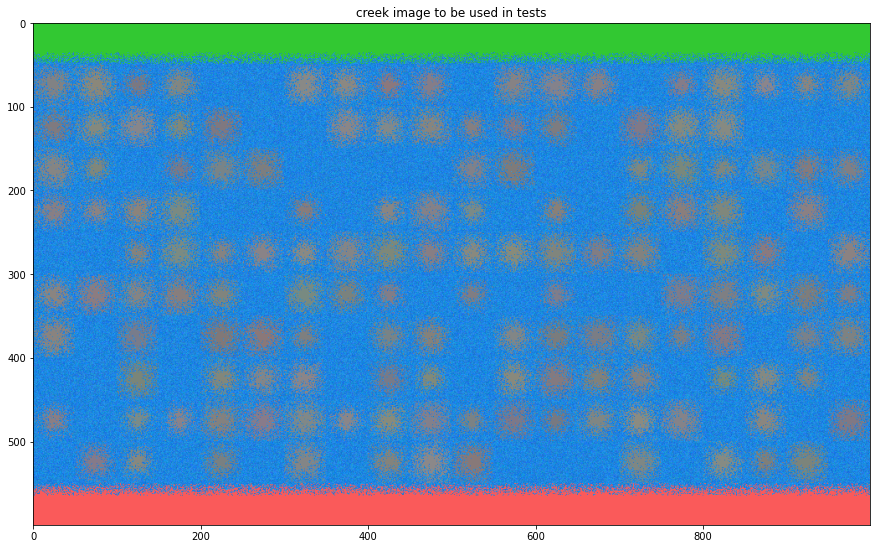

In [62]:
creekImg = creekImage(0.7)
plt.title('creek image to be used in tests')
plt.imshow(creekImg)

## Define constaints
Minimum stone area and maximum robot step size are to be defined.
Note that durint tests, I will change these to test your code's response to different constraints.  

In [63]:
# any stone smaller than minStoneArea cannot be used in your solution

# Average stone are in our code is ~600. In order to prevent the 
# multiple rocks formations, several operations done on the image.
# In the end rocks area are reduced.
minStoneArea = 600  # In order to

'''
centers of consequitive stones on your solution path should
have cartesian distance that is equal or less than this distance
also red shore to first stone, last stone to green shore should not be any longer than maxStride
'''
maxStride = 110

## Find Stones
Find stones and at the end display ```creekImage```, where stones are placed in bounding boxes with proper colors, i.e. small stones are RED, steppable stones are GREEN.  

Note that you can add as many code block below until you display the boxed creek image.  

Explain your steps in your approach very briefly but clearly. If necessary, provide references to sites from where you got some part of your code.

In [64]:
import numpy as np
import cv2
from math import *

# kernel for the dilation, erotion and blur operations
kernel = np.ones((7, 7), np.uint8)

img0 = creekImg

# Eliminating the green zone at the top
# A mask is generated from the green pixels and mask is subtracted 
# from the original image
mask_green = cv2.inRange(img0,  np.array([50,199,50]),  np.array([50,201,50]))
temp1 = img0.copy()
temp1[mask_green == 0] = 0
temp1[mask_green != 0] = img0[mask_green != 0]
green_filtered = cv2.bitwise_xor(img0, temp1)

# Eliminating the red zone at the bottom
mask_red = cv2.inRange(green_filtered,  np.array([249,90,90]),  np.array([251,90,90]))
temp2 = green_filtered.copy()
temp2[mask_red == 0] = 0
temp2[mask_red != 0] = green_filtered[mask_red != 0]
red_filtered = cv2.bitwise_xor(green_filtered, temp2)

# Eliminating the blur zone
mask_blue = cv2.inRange(red_filtered,  np.array([0,0,200]),  np.array([255,255,250]))
temp3 = red_filtered.copy()
temp3[mask_blue == 0] = 0
temp3[mask_blue != 0] = red_filtered[mask_blue != 0]
blue_filtered = cv2.bitwise_xor(red_filtered, temp3)

# Gaussian blur is done in order to find the valid stones
blurred = cv2.GaussianBlur(blue_filtered,(3,3),cv2.BORDER_DEFAULT)
blurred_grey =  cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Because of the nature of the gaussian blur, areas where density of the gray 
# color is high becomes more grayish (saturation peaks at the center and decrease towards the edges).
# By filtering the gray saturation on the stone, valid stones are found. 
# However, because of the gaussian blur, contour area of the 
# obtained rocks are significantly reduced. by ~%20-30.
ret, thresh1 = cv2.threshold(blurred_grey, 70, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Noises that appears like contours are eliminated by setting an area threshold of 100
modified_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 100:
        modified_contours.append(contour)

green_contour = []
red_contour = []
green_points = []
red_points = []

# Rocks are separated by their contour area as valid or non-valid
for contour in modified_contours:
    if cv2.contourArea(contour) > minStoneArea:
        green_contour.append(contour)
    else:
        red_contour.append(contour)

# Finding the centers of the valid rocks
for i in green_contour:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        green_points.append([cx,cy])

# Finding the centers of the non-valid rocks
for i in red_contour:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        red_points.append([cx,cy])


### Finally display boxed image

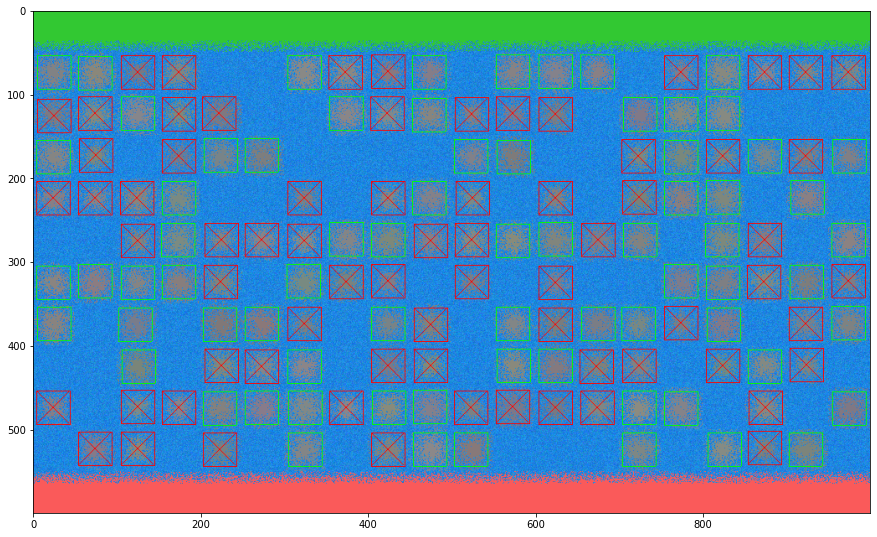

In [65]:
# Drawing signs on rocks with the given function in the problem definition
for green in green_points:
    img0 = DrawOnImage(img0, ((green[1]-20,green[0]-20),(green[1]+20,green[0]+20)), box=True, diagonals = False, dpen=penGreen)

for red in red_points:
    img0 = DrawOnImage(img0, ((red[1]-20,red[0]-20),(red[1]+20,red[0]+20)), box=True) 

plt.imshow(img0)

## Find your solution path
Your solution should be the one with minimum number of steps where the steps are less than ```maxStride```.  

Explain your steps in your approach very briefly but clearly. If necessary, provide references to sites from where you got some part of your code.

In [66]:
start_points = []

# Sort algorithm for nested lists.
# This algorithm allows sorting of a nested list by a particular indexes in each sublist.
def Sort(sub_li):
    l = len(sub_li)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (sub_li[j][1] > sub_li[j + 1][1]):
                tempo = sub_li[j]
                sub_li[j]= sub_li[j + 1]
                sub_li[j + 1]= tempo
    return sub_li

# Initial values for minimum path
min_path = 99999
minimum_path  = []

# Shortest path algorithm with recursion
# arguments are the current point and all the previous steps
def shortest_path(start_point,previous_point):
    global minimum_path,min_path

    # Creating empty connected points in each call
    connected_points = []
    previous_point.append(start_point)

    # If end is reach, below if statement is run
    if start_point[1] < maxStride:

        previous_point.append([previous_point[-1][0],previous_point[-1][1]-maxStride])
        
        # Previos point list consists of each steps whether it leads to final conclusion or not.
        # Depth search method is done. Even if a route is failed and different route is chosen,
        # Previous route is stored in the list. Below loop deletes the failed routes.
        c = False
        while True:
            i = 0

            # Eliminating the previous points where a comeback happened.
            for i in range(len(previous_point)-1):
                if previous_point[i][1] < previous_point[i+1][1]+5:
                    del previous_point[i]
                    c = True
                    break
            if c:
                c = False
                continue
            break

        return previous_point
    
    # Looking every rock and find the valid rocks closer than the max stride
    for gp in green_points:
        if gp != start_point:
            distance = dist(gp, start_point)
            if distance < maxStride and not start_point[1]-5 < gp[1]:
                connected_points.append(gp)

    # Closer rocks are sorted with their decrease in y component. 
    # This allows finding the closest rock to the finish. 
    connected_points = Sort(connected_points)

    # Iterating every close rock recursively until reaching the end. 
    # If one fail, algorithm returns to the parent rock and tries a different rock 
    for points in connected_points:

        path = shortest_path(points,previous_point)

        # Minimum path is found by sorting paths according to the minimum jump.
        if path is not None:
            if len(path) < min_path:
                min_path = len(path)
                minimum_path = path

    # This also helps deleting the comeback routes.
    if not len(connected_points):
        del previous_point[-1]
        return

# Finding the inital point for the algorithm 
for gp in green_points: 
    if abs(gp[1] - green_points[0][1]) < 5 + maxStride:
        start_points.append(gp)

for start_point in start_points: 
    path = shortest_path(start_point,[])

### Finally, display your solution path
On the original ```creekImage``` where a line starts somewhere in the red region, and moves from the center of one stone to another to pass the creek and endup on the green side.  

If a solution is not possible, then print an appropriate message.

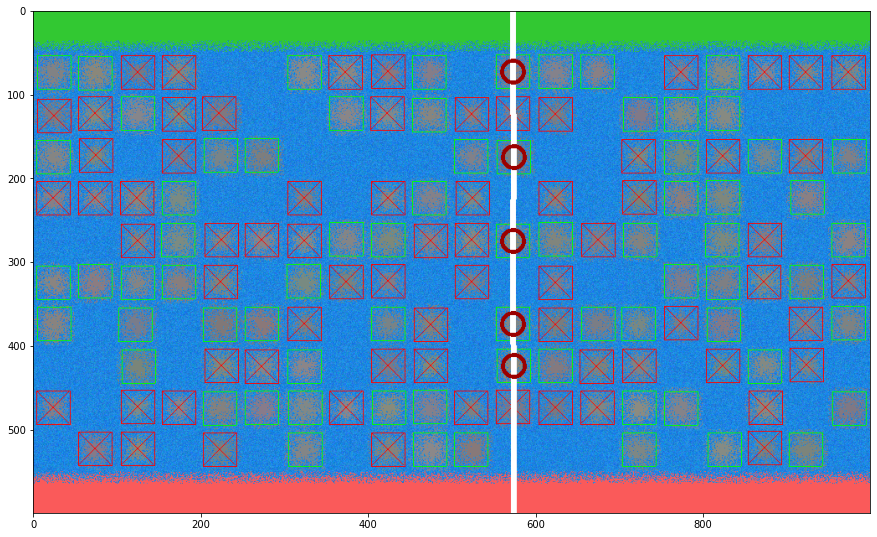

In [67]:
try:
    # Drawing line through the route
    minimum_path.insert(0,[minimum_path[0][0],800])
    for i in range(len(minimum_path)-1):
        cv2.line(img0, minimum_path[i],minimum_path[i+1],(255,255,255),5)
        cv2.circle(img0, (minimum_path[i][0],minimum_path[i][1]), 13, (155, 0, 0), 3)

    plt.imshow(img0)
except:
    print("There is no available route.")